In [2]:
#DPSAT v.1.0 created by watcharawuth.k@up.ac.th
#First Cell Mount and give Authority Google Drive for Google Colab user
from google.colab import drive
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Second Cell Separate the video file into still images of star 
# the number of file depend on recorded time and frame per seconds ratio 
#video_path = '/content/drive/My Drive/DPSAT/Arcturus.mp4'   #user can modify the video_path name 
video_cap = cv.VideoCapture('/content/drive/My Drive/Arcturus.mp4')   #user can modify the video_path name 
success = True
count = 1
while success:
  success,frame = video_cap.read()
  name = '/content/drive/My Drive/'"Arcturus"+str(count).zfill(3)+'.jpg'  #Star Name or the oothers samples can modify
  if success == True:
    cv.imwrite(name,frame)
    print('Frame {} Extracted Successfully'.format(count))
    count = count+1
  else:
    break

In [ ]:
#The Third Cell Filename Process and setup parameter for Image Analysis#
from glob import glob
i = 0
img_mask = '/content/drive/My Drive/Arcturus*.jpg'  #object : e.g. 
img_names = glob(img_mask)
for fn in sorted(img_names):
    print('processing %s...' % fn,)
    i +=1
    img = cv.imread(fn, 1)
    #print(img.shape)
    imggray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)   #Transform image color from RGB to Gray space
    ret, thresh = cv.threshold(imggray, 0, 255, 0)
    #print(imggray.shape)
    datatub=(minVal,maxVal, minLoc, maxLoc) = cv.minMaxLoc(imggray)
    
    #Aperture Photometry around maximum value 
    data = np.asarray(datatub)
    xcen = data[3][1]
    ycen = data[3][0]
    centerval = imggray[xcen,ycen]
 
    #square Aperture Photometry around maximum value 
    aper = 16     #adaptable squared-aperture length (pixels)
    hfaper = int(aper/2)   #half of square-lenght
    bgsignal = 0   #bgsignal
    sumval_bgsignal = 0   #initial value of signal  
    count_bgsignal = 0    #initial value of counted pixel
    for val in np.nditer(imggray[xcen-hfaper:xcen+hfaper,ycen-hfaper:ycen+hfaper]):
        if val >= bgsignal :  
          sumval_bgsignal = sumval_bgsignal + val
          count_bgsignal = count_bgsignal + 1
    pixel = imggray[xcen-hfaper:xcen+hfaper,ycen-hfaper:ycen+hfaper].size  #number of pixel in rectangula aperture 
    magnitude = -2.5*np.log10(sumval_bgsignal-aper*aper*bgsignal)
    print(sumval_bgsignal,count_bgsignal,pixel)   #check value
    
    #show the processing pictures
    cv.rectangle(imggray,(ycen-hfaper,xcen-hfaper),(ycen+hfaper,xcen+hfaper),(255,0,0),1)
    cropped = imggray[xcen-hfaper:xcen+hfaper, ycen-hfaper:ycen+hfaper]  #comment for show only rectagular aperture area
    #plt.imshow(cv.cvtColor(imggray,cv.COLOR_GRAY2RGB),cmap='gray')
    plt.imshow(cv.cvtColor(cropped,cv.COLOR_GRAY2RGB),cmap='gray') #Show cropped image
    plt.show()
    #print(data) #For Debugging Check out Data
    with open('/content/drive/My Drive/arcturusspc2022_ap02.txt','a') as f:
        f.write('%d\t %d\t %d\t %d\t' %(i, data[1], xcen,ycen,))
        f.write('%d\t %d\t %d\t %d\n' %(sumval_bgsignal,count_bgsignal,magnitude,pixel))

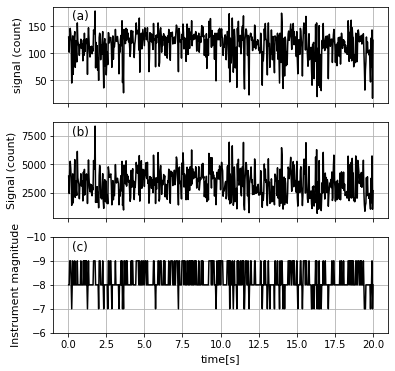

In [18]:
#The Forth Cell data analysis
dataplot = np.loadtxt(fname = '/content/drive/My Drive/arcturusspc2022_ap02.txt')    
xp = dataplot[0:600,0]/30.0
#print(xp)
lmax = dataplot[0:600,1] #/dataplot[0][1]  
sumval_bgsignal = dataplot[0:600,4] #/dataplot[0][4]  
magnitude = dataplot[0:600,6]
number_pixel = dataplot[0:600,7] #/dataplot[0][7] 
#print(fp)
#offset = (sum_fwhm - sum_bgsignal)
mean_bgsignal=np.mean(sumval_bgsignal)
#print(mean_bgsignal)
#print(np.std(sumval_bgsignal))
from matplotlib.font_manager import FontProperties

font = FontProperties()
font.set_family('serif')
font.set_name('times')
font.set_style('normal')
font.set_size('11')

fig, (ax1, ax2, ax3) = plt.subplots(3, 1)
#fig.suptitle('Signals from the example star: Arcturus')
fig.set_size_inches(6,6)

ax1.set_title('(a)', x=0.08,y=0.8)
#ax1.set_title('a) Maximum Signal of still images')
ax1.plot(xp, lmax, c = 'k', linestyle ='-')
ax1.set_ylabel('signal (count)', fontproperties=font)
ax1.xaxis.set_tick_params(labelbottom=False)
ax1.grid(True)

ax2.set_title('(b)', x=0.08,y= 0.8)
#ax2.set_title('b) Summation of Signal from aperture')
ax2.plot(xp, sumval_bgsignal, c= 'k', linestyle ='-')
ax2.set_ylabel('Signal (count)', fontproperties=font)
ax2.xaxis.set_tick_params(labelbottom=False)
ax2.grid(True)

ax3.set_title('(c)', x=0.08,y= 0.8)
#ax3.set_title('c) Instrument magnitude from square aperture pixels')
ax3.plot(xp, magnitude, c= 'k', linestyle ='-')
ax3.invert_yaxis()
ax3.set_ylim([-6.0, -10.0])
ax3.set_xlabel('time[s]', fontsize='11', fontweight='normal')
ax3.set_ylabel('Instrument magnitude', fontproperties=font)
ax3.grid(True)

#plt.show()
plt.savefig('/content/drive/My Drive/figure02.png',dpi=720) #Change the number 16 as aper parameter in the 3 cell 